In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
sys.path.append("../..")


import pandas as pd
from typing import Dict, List
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import json

sns.set_style("whitegrid", {"grid.color": ".93"})

from src.paper_analysis_hydropower import NationalAnalysisHydropower

In [3]:
paths = json.load(open("../paths.json"))

path_data_nexuse_simulations = Path(paths["path_data_nexuse_simulations"])
path_figs = Path(paths["path_figs"])

In [4]:
date_range_2050_hourly = pd.date_range("2050-01-01", "2051-01-01", freq="1H", inclusive="left")

In [5]:
cm = 1/2.54

In [6]:
paths_simulations_ref_renewable = sorted(list((path_data_nexuse_simulations / "centiv_v47_ref_renewable_target").glob("*")))
simulation_ref_renewable_names = ([int(path.stem.split("_")[-1]) for path in paths_simulations_ref_renewable])

paths_simulations_high_renewable = sorted(list((path_data_nexuse_simulations / "centiv_v47_high_renewable_target").glob("*")))
simulation_high_renewable_names = ([int(path.stem.split("_")[-1]) for path in paths_simulations_high_renewable])

# Load data

## Total capacity in 2050

In [7]:
dfs_cap_ref_renewable = [pd.read_csv(path / "resultPostProcess" / "Cap_CH_centiv_distiv.csv", index_col=0)[["2050"]] 
                        for path in paths_simulations_ref_renewable]

dfs_cap_high_renewable = [pd.read_csv(path / "resultPostProcess" / "Cap_CH_centiv_distiv.csv", index_col=0)[["2050"]] 
                           for path in paths_simulations_high_renewable]

In [8]:
df_cap_ref_renewable = pd.concat(dfs_cap_ref_renewable, axis=1)
df_cap_ref_renewable.columns = simulation_ref_renewable_names
df_cap_ref_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Dam,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,...,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000
Pump-Open,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,...,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000
RoR,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,...,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625
Waste,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,...,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000,228.50000
WindOn,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,...,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000,74.96000


In [9]:
df_cap_high_renewable = pd.concat(dfs_cap_high_renewable, axis=1)
df_cap_high_renewable.columns = simulation_high_renewable_names
df_cap_high_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Dam,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,...,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000,8203.00000
PV-alpine,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,...,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000
PV-roof,33277.00000,33278.00000,33278.00000,33279.00000,33278.00000,33278.00000,33278.00000,33278.00000,33279.00000,33279.00000,...,33279.00000,33279.00000,33275.00000,33278.00000,33277.00000,33278.00000,33279.00000,33277.00000,33278.00000,33277.00000
Pump-Open,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,...,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000,4556.60000
RoR,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,...,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625,3847.51625


## Total generation in 2050

In [10]:
dfs_gens_ref_renewable = []
for path in paths_simulations_ref_renewable:
    df_gens_ref_renewable = pd.read_csv(path / "resultPostProcess" / "Gen_CH_2050_c.csv", index_col=0) 
    df_gens_ref_renewable.index = date_range_2050_hourly
    dfs_gens_ref_renewable.append(df_gens_ref_renewable)

dfs_gens_high_renewable = []
for path in paths_simulations_high_renewable:
    df_gens_high_renewable = pd.read_csv(path / "resultPostProcess" / "Gen_CH_2050_c.csv", index_col=0) 
    df_gens_high_renewable.index = date_range_2050_hourly
    dfs_gens_high_renewable.append(df_gens_high_renewable)

In [11]:
df_gen_ref_renewable = pd.concat(dfs_gens_ref_renewable, axis=1, keys=simulation_ref_renewable_names)
df_gen_high_renewable = pd.concat(dfs_gens_high_renewable, axis=1, keys=simulation_high_renewable_names)

In [12]:
df_gen_ref_renewable.head()

1991                                                \
                          Dam          RoR Nuclear Nuclear-FastRamp Lignite   
2050-01-01 00:00:00  0.196823  1531.725222     0.0              0.0     0.0   
2050-01-01 01:00:00  0.195244  1531.725274     0.0              0.0     0.0   
2050-01-01 02:00:00  0.196117  1531.725276     0.0              0.0     0.0   
2050-01-01 03:00:00  0.196327  1531.725270     0.0              0.0     0.0   
2050-01-01 04:00:00  0.196424  1531.725267     0.0              0.0     0.0   

                                                          ...            2022  \
                    Coal Coal-IGCC GasCC GasCC-CCS GasSC  ... EMob Shift (Up)   
2050-01-01 00:00:00  0.0       0.0   0.0       0.0   0.0  ...     -210.251844   
2050-01-01 01:00:00  0.0       0.0   0.0       0.0   0.0  ...     -210.476849   
2050-01-01 02:00:00  0.0       0.0   0.0       0.0   0.0  ...     -210.666997   
2050-01-01 03:00:00  0.0       0.0   0.0       0.0   0.0  ...     -210.798570   
2050-01-01 04:00:00  0.0       0.0   0.0       0.0   0.0  ...     -210.823744   

                                                                           \
                    Load_Shed Load_Shed-Ind DAC (Load) Methanation (Load)   
2050-01-01 00:00:00   0.00003           0.0        0.0                0.0   
2050-01-01 01:00:00   0.00003           0.0        0.0                0.0   
2050-01-01 02:00:00   0.00003           0.0        0.0                0.0   
2050-01-01 03:00:00   0.00003           0.0        0.0                0.0   
2050-01-01 04:00:00   0.00003           0.0        0.0                0.0   

                                                                           
                    Load (Total) PV-Total Wind-Total      Imports Exports  
2050-01-01 00:00:00       9171.0      0.0   4.488099  7005.195647    -0.0  
2050-01-01 01:00:00       8531.0      0.0  20.498014  6381.864658    -0.0  
2050-01-01 02:00:00       8197.0      0.0  23.308009  6033.642421    -0.0  
2050-01-01 03:00:00       7941.0      0.0  30.148003  5843.476776    -0.0  
2050-01-01 04:00:00       7864.0      0.0  18.958015  5851.154552    -0.0  

[5 rows x 1984 columns]

In [13]:
df_annual_ror_gen_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "RoR")].sum().droplevel(1)
df_annual_imports_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "Imports")].sum().droplevel(1)
df_annual_exports_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "Exports")].sum().droplevel(1)

In [14]:
df_annual_ror_gen_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "RoR")].sum().droplevel(1)
df_annual_imports_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "Imports")].sum().droplevel(1)
df_annual_exports_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "Exports")].sum().droplevel(1)

In [15]:
winter_months = [1, 2, 3, 10, 11, 12]

df_monthly_imports_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "Imports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)
df_monthly_exports_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "Exports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)

df_winter_imports_ref_renewable = df_monthly_imports_ref_renewable[df_monthly_imports_ref_renewable.index.month.isin(winter_months)].sum(axis=0)
df_winter_exports_ref_renewable = df_monthly_exports_ref_renewable[df_monthly_exports_ref_renewable.index.month.isin(winter_months)].sum(axis=0)

In [16]:
df_monthly_imports_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "Imports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)
df_monthly_exports_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "Exports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)

df_winter_imports_high_renewable = df_monthly_imports_high_renewable[df_monthly_imports_high_renewable.index.month.isin(winter_months)].sum(axis=0)
df_winter_exports_high_renewable = df_monthly_exports_high_renewable[df_monthly_exports_high_renewable.index.month.isin(winter_months)].sum(axis=0)

In [17]:
df_pumped_storage_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), df_gen_ref_renewable.columns.get_level_values(1).str.startswith("Pump-Open"))].groupby(pd.Grouper(freq='M')).sum() * 1e-3
df_pumped_storage_high_renewable = df_gen_high_renewable.loc[:, (slice(None), df_gen_high_renewable.columns.get_level_values(1).str.startswith("Pump-Open"))].groupby(pd.Grouper(freq='M')).sum() * 1e-3

In [18]:
df_annual_wind_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), "Wind-Total")].sum().droplevel(1)
df_annual_wind_high_renewable = df_gen_high_renewable.loc[:, (slice(None), "Wind-Total")].sum().droplevel(1)

In [19]:
df_annual_net_generation_ref_renewable = df_gen_ref_renewable.groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()
df_annual_net_generation_high_renewable = df_gen_high_renewable.groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()

In [20]:
df_annual_domestic_generation_ref_renewable = df_gen_ref_renewable.loc[:, (slice(None), slice("Dam", "Pump-Closed"))].groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()
df_annual_domestic_generation_high_renewable = df_gen_high_renewable.loc[:, (slice(None), slice("Dam", "Pump-Closed"))].groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()

## Electricity prices

### Annual

In [21]:
dfs_elec_price_ref_renewable = []

for path in paths_simulations_ref_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_annual_c.csv"))[0]
    df_elec_price_ref_renewable = pd.read_csv(path_file, index_col=0) 
    dfs_elec_price_ref_renewable.append(df_elec_price_ref_renewable)

dfs_elec_price_high_renewable = []

for path in paths_simulations_high_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_annual_c.csv"))[0]
    df_elec_price_high_renewable = pd.read_csv(path_file, index_col=0) 
    dfs_elec_price_high_renewable.append(df_elec_price_high_renewable)

In [22]:
df_elec_price_ref_renewable = pd.concat(dfs_elec_price_ref_renewable, axis=1)
df_elec_price_ref_renewable.columns = simulation_ref_renewable_names
df_elec_price_ref_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Row,,,,,,,,,,,,,,,,,,,,,
Switzerland,12.163003,10.413594,10.462343,10.223849,11.106953,12.159760,12.381313,11.624703,10.600916,9.735163,...,10.200368,9.630490,12.570610,12.581323,62.140865,10.732885,9.573440,10.894347,23.875714,12.035519
Germany,16.006391,15.920217,15.934032,15.949022,15.974572,15.954220,15.970207,15.971073,15.918339,15.923278,...,15.911739,15.926735,15.981229,16.015449,16.038654,15.938741,15.867562,15.994595,16.027024,15.999096
Italy,6.163339,6.119109,6.105699,6.110426,6.120492,6.140213,6.104922,6.140713,6.092513,6.088319,...,6.119276,6.125093,6.128386,6.130373,6.181037,6.123186,6.052284,6.139547,6.129440,6.165649
France,3.850314,3.823743,3.820381,3.819685,3.823727,3.836363,3.836761,3.834747,3.807243,3.814049,...,3.806926,3.821441,3.836149,3.838528,3.871326,3.824744,3.807135,3.839500,3.846207,3.852872
Austria,3.634180,3.563636,3.592052,3.590189,3.596215,3.599228,3.599282,3.608337,3.566920,3.568652,...,3.555226,3.578623,3.618318,3.618254,3.649698,3.576798,3.517621,3.613480,3.634373,3.614671


In [23]:
df_elec_price_high_renewable = pd.concat(dfs_elec_price_high_renewable, axis=1)
df_elec_price_high_renewable.columns = simulation_high_renewable_names
df_elec_price_high_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Row,,,,,,,,,,,,,,,,,,,,,
Switzerland,7.507614,7.334006,7.281495,7.432403,7.397503,7.505620,7.259750,7.595808,7.048486,7.454925,...,7.398497,7.340280,7.791427,7.707151,7.768841,7.351068,7.181985,7.546543,7.590552,7.587843
Germany,15.743581,15.763889,15.725127,15.789583,15.789158,15.777368,15.782984,15.805366,15.706198,15.788762,...,15.774184,15.736599,15.793732,15.797468,15.793634,15.738917,15.759818,15.800424,15.792005,15.789322
Italy,5.786053,5.696158,5.723727,5.751615,5.822353,5.736306,5.760291,5.745953,5.720750,5.711849,...,5.704045,5.732500,5.804307,5.816174,5.801796,5.764240,5.692363,5.780300,5.829139,5.807280
France,3.739002,3.725080,3.726331,3.728121,3.741947,3.741448,3.734717,3.735802,3.726997,3.727809,...,3.722599,3.727916,3.744109,3.743715,3.746142,3.733829,3.721489,3.740615,3.743089,3.752316
Austria,3.449853,3.430145,3.447601,3.460427,3.437146,3.448225,3.440393,3.489702,3.417568,3.461912,...,3.459533,3.469697,3.450087,3.450752,3.449213,3.377416,3.425005,3.465916,3.439401,3.465486


### Monthly

In [24]:
dfs_elec_price_monthly_ref_renewable = []

for path in paths_simulations_ref_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_ref_renewable = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_monthly_ref_renewable.append(df_elec_price_monthly_ref_renewable)

dfs_elec_price_monthly_high_renewable = []

for path in paths_simulations_high_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_high_renewable = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_monthly_high_renewable.append(df_elec_price_monthly_high_renewable)

In [25]:
df_elec_price_monthly_ref_renewable = pd.concat(dfs_elec_price_monthly_ref_renewable, axis=1)
df_elec_price_monthly_ref_renewable.columns = simulation_ref_renewable_names
df_elec_price_monthly_ref_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
1,12.487372,10.166308,9.755006,9.082287,10.167264,12.912508,12.980126,11.711089,10.197766,8.730662,...,9.470401,8.354339,12.899633,13.009192,102.056116,10.051916,8.698849,9.876425,32.899112,11.934593
2,15.732535,13.402779,13.163515,12.495649,13.223984,16.265347,16.060220,15.003587,13.508530,11.797629,...,12.652951,11.701788,16.176953,15.933663,103.585701,13.350673,11.947351,12.947709,35.588514,15.131830
3,14.232409,12.361961,12.552743,11.801618,12.521536,15.200739,14.612673,13.816157,12.482834,11.400503,...,12.217895,11.255579,15.005992,14.935143,97.312542,12.716524,11.262774,12.192538,33.311408,14.125876
4,3.040890,2.962166,2.962413,2.964342,2.927742,3.022847,3.047391,2.982419,2.959726,2.937132,...,2.984268,2.964576,2.848089,2.931599,3.026798,2.915458,2.950972,2.963678,3.012999,2.998232
5,2.874100,2.580676,2.657957,2.574733,2.596498,2.588763,2.587259,2.673545,2.573011,2.572936,...,2.575104,2.675569,2.577587,2.666796,2.624084,2.580560,2.690158,2.670815,2.583413,2.594278


In [26]:
df_elec_price_monthly_high_renewable = pd.concat(dfs_elec_price_monthly_high_renewable, axis=1)
df_elec_price_monthly_high_renewable.columns = simulation_high_renewable_names
df_elec_price_monthly_high_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
1,4.400284,4.470487,4.303569,4.050385,4.055266,4.422997,4.335537,4.350330,4.422374,4.449518,...,4.440285,4.363320,4.280227,4.355117,4.858017,4.037869,4.414740,4.407332,4.321219,4.425896
2,6.608169,6.789050,6.725768,6.500122,5.571683,6.954423,5.845254,6.744803,6.417931,6.277462,...,6.605116,6.582540,6.750133,5.942451,6.718945,6.579337,6.431212,5.946005,5.815210,6.405448
3,5.359436,6.003354,6.334308,5.795291,4.637867,6.530408,4.464176,5.940157,5.354914,5.612350,...,6.259325,5.861388,6.038495,5.152848,5.735317,6.151131,5.546146,4.958969,4.904439,5.875036
4,2.448328,2.490297,2.447167,2.487954,2.427335,2.526111,2.509534,2.446693,2.383029,2.504965,...,2.522751,2.438646,2.473911,2.421512,2.493239,2.438941,2.484759,2.514547,2.490198,2.503664
5,2.366356,2.243683,2.280425,2.210309,2.233837,2.284915,2.248025,2.357005,2.189489,2.219546,...,2.258194,2.309406,2.259835,2.272586,2.304899,2.263197,2.305502,2.322752,2.247956,2.304404


In [27]:
dfs_elec_price_monthly_ref_renewable_all = []

for path in paths_simulations_ref_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_ref_renewable_all = pd.read_csv(path_file, index_col=0)
    dfs_elec_price_monthly_ref_renewable_all.append(df_elec_price_monthly_ref_renewable_all)

df_elec_price_monthly_ref_renewable_all = (pd.concat(dfs_elec_price_monthly_ref_renewable_all, 
                                                   axis=1, keys=simulation_ref_renewable_names)
                                          .swaplevel(0, 1, axis=1)
                                          .sort_index(axis=1, level=0))

dfs_elec_price_monthly_high_renewable_all = []

for path in paths_simulations_high_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_high_renewable_all = pd.read_csv(path_file, index_col=0)
    dfs_elec_price_monthly_high_renewable_all.append(df_elec_price_monthly_high_renewable_all)

df_elec_price_monthly_high_renewable_all = (pd.concat(dfs_elec_price_monthly_high_renewable_all, 
                                                      axis=1, keys=simulation_high_renewable_names)
                                             .swaplevel(0, 1, axis=1)
                                             .sort_index(axis=1, level=0))

### Seasonal

In [28]:
df_elec_price_summer_winter_high_renewable = df_elec_price_monthly_high_renewable.copy()
df_elec_price_summer_winter_high_renewable.index = ["Winter" if i < 4 or i > 9 else "Summer" for i in range(1, 13)]
df_elec_price_summer_winter_high_renewable = df_elec_price_summer_winter_high_renewable.groupby(df_elec_price_summer_winter_high_renewable.index).agg("mean")

df_elec_price_summer_winter_ref_renewable = df_elec_price_monthly_ref_renewable.copy()
df_elec_price_summer_winter_ref_renewable.index = ["Winter" if i < 4 or i > 9 else "Summer" for i in range(1, 13)]
df_elec_price_summer_winter_ref_renewable = df_elec_price_summer_winter_ref_renewable.groupby(df_elec_price_summer_winter_ref_renewable.index).agg("mean")

In [29]:
seasons = {"DJF": [12, 1, 2], "MAM": [3, 4, 5], "JJA": [6, 7, 8], "SON": [9, 10, 11]}
seasons = {i: season for season in seasons for i in seasons[season]}

df_elec_price_seasonal_high_renewable = df_elec_price_monthly_high_renewable.copy()
df_elec_price_seasonal_high_renewable.index = [seasons[i] for i in range(1, 13)]
df_elec_price_seasonal_high_renewable = df_elec_price_seasonal_high_renewable.groupby(df_elec_price_seasonal_high_renewable.index).agg("mean")
df_elec_price_seasonal_high_renewable = df_elec_price_seasonal_high_renewable.loc[["DJF", "MAM", "JJA", "SON"]]


df_elec_price_seasonal_ref_renewable = df_elec_price_monthly_ref_renewable.copy()
df_elec_price_seasonal_ref_renewable.index = [seasons[i] for i in range(1, 13)]
df_elec_price_seasonal_ref_renewable = df_elec_price_seasonal_ref_renewable.groupby(df_elec_price_seasonal_ref_renewable.index).agg("mean")
df_elec_price_seasonal_ref_renewable = df_elec_price_seasonal_ref_renewable.loc[["DJF", "MAM", "JJA", "SON"]]

In [30]:
df_elec_price_seasonal_ref_renewable

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
DJF,19.279188,16.127828,16.137565,15.720037,17.572620,19.239001,19.623361,18.411786,16.413058,15.035166,...,15.823646,14.696839,20.184461,20.367847,108.148286,16.444390,14.651551,17.225488,40.225825,19.216342
MAM,6.715800,5.968268,6.057704,5.780231,6.015259,6.937450,6.749108,6.490707,6.005190,5.636857,...,5.925755,5.631908,6.810556,6.844513,34.321141,6.070847,5.634635,5.942344,12.969273,6.572796
JJA,4.961219,4.951662,4.929176,4.904928,4.870632,5.025790,4.941502,5.035850,4.806223,4.892959,...,4.906611,4.925173,4.985812,4.904942,5.086529,5.040618,4.831940,4.994326,4.880085,5.086023
SON,13.942728,11.653208,11.699664,11.608788,12.612804,13.644378,14.337915,13.023244,12.106423,10.654990,...,11.229134,10.646056,14.285242,14.161394,73.757467,12.327483,10.554264,12.193741,28.123261,13.535288


## Imports/Exports prices

In [32]:
dfs_elec_price_hourly_ref_renewable = []

for path in paths_simulations_ref_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_hourly_c_2050.csv"))[0]
    df_elec_price_hourly_ref_renewable = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_hourly_ref_renewable.append(df_elec_price_hourly_ref_renewable)

dfs_elec_price_hourly_high_renewable = []

for path in paths_simulations_high_renewable:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_hourly_c_2050.csv"))[0]
    df_elec_price_hourly_high_renewable = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_hourly_high_renewable.append(df_elec_price_hourly_high_renewable)

In [33]:
df_elec_price_hourly_ref_renewable = pd.concat(dfs_elec_price_hourly_ref_renewable, axis=1)
df_elec_price_hourly_ref_renewable.columns = simulation_ref_renewable_names
df_elec_price_hourly_ref_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Hour,,,,,,,,,,,,,,,,,,,,,
0,9.356233,6.969303,6.919680,6.366997,7.355477,9.791948,9.931946,8.707278,7.203554,5.679233,...,6.556815,5.452748,10.000516,10.000118,97.134241,7.322802,5.728433,6.980851,29.785462,8.889463
1,9.356232,6.969303,6.919679,6.366997,7.355477,9.791947,9.931945,8.707277,7.203553,5.679233,...,6.556814,5.452748,10.000515,10.000118,97.134241,7.322801,5.728432,6.980851,29.785461,8.889463
2,9.356232,6.969303,6.919679,6.366996,7.355477,9.791947,9.931945,8.707277,7.203553,5.679233,...,6.556814,5.452747,10.000515,10.000118,97.134240,7.322801,5.728432,6.980850,29.785461,8.889462
3,9.356232,6.969302,6.919679,6.366996,7.355477,9.791946,9.931945,8.707277,7.203553,5.679232,...,6.556814,5.452747,10.000515,10.000118,97.134240,7.322801,5.728432,6.980850,29.785461,8.889462
4,9.356232,6.969302,6.919679,6.366996,7.355477,9.791946,9.931945,8.707277,7.203553,5.679232,...,6.556814,5.452747,10.000515,10.000118,97.134240,7.322801,5.728432,6.980850,29.785461,8.889462


In [34]:
df_elec_price_hourly_high_renewable = pd.concat(dfs_elec_price_hourly_high_renewable, axis=1)
df_elec_price_hourly_high_renewable.columns = simulation_high_renewable_names
df_elec_price_hourly_high_renewable.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Hour,,,,,,,,,,,,,,,,,,,,,
0,1.000003,1.000004,1.000004,1.000004,1.000003,1.000004,1.000003,1.000004,1.000003,1.000002,...,1.000002,1.000004,1.000003,1.000005,1.000004,1.000003,1.000004,1.000004,1.000004,1.000002
1,1.000002,1.000003,1.000003,1.000003,1.000003,1.000003,1.000002,1.000003,1.000003,1.000002,...,1.000002,1.000004,1.000003,1.000005,1.000003,1.000003,1.000003,1.000004,1.000003,1.000002
2,1.000002,1.000003,1.000003,1.000003,1.000003,1.000003,1.000002,1.000003,1.000003,1.000002,...,1.000002,1.000003,1.000002,1.000004,1.000003,1.000002,1.000003,1.000003,1.000003,1.000002
3,1.000002,1.000002,1.000002,1.000002,1.000002,1.000003,1.000002,1.000003,1.000002,1.000002,...,1.000002,1.000003,1.000002,1.000004,1.000002,1.000002,1.000002,1.000003,1.000003,1.000002
4,1.000002,1.000003,1.000003,1.000003,1.000003,1.000003,1.000002,1.000003,1.000003,1.000002,...,1.000002,1.000003,1.000002,1.000004,1.000003,1.000002,1.000003,1.000003,1.000003,1.000002


In [35]:
df_ratio_imports_elecprice_ref_renewable = (df_gen_ref_renewable.loc[:, (slice(None), "Imports")].droplevel(1, axis=1) / df_elec_price_hourly_ref_renewable.set_index(df_gen_ref_renewable.index)).replace([np.inf, -np.inf], np.nan)
df_ratio_exports_elecprice_ref_renewable = ((-df_gen_ref_renewable.loc[:, (slice(None), "Exports")]).droplevel(1, axis=1) / df_elec_price_hourly_ref_renewable.set_index(df_gen_ref_renewable.index)).replace([np.inf, -np.inf], np.nan)

df_monthly_mean_ratio_imports_elecprice_ref_renewable = df_ratio_imports_elecprice_ref_renewable.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())
df_monthly_mean_ratio_exports_elecprice_ref_renewable = df_ratio_exports_elecprice_ref_renewable.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())

In [36]:
df_ratio_imports_elecprice_high_renewable = (df_gen_high_renewable.loc[:, (slice(None), "Imports")].droplevel(1, axis=1) / df_elec_price_hourly_high_renewable.set_index(df_gen_ref_renewable.index)).replace([np.inf, -np.inf], np.nan)
df_ratio_exports_elecprice_high_renewable = ((-df_gen_high_renewable.loc[:, (slice(None), "Exports")]).droplevel(1, axis=1) / df_elec_price_hourly_high_renewable.set_index(df_gen_ref_renewable.index)).replace([np.inf, -np.inf], np.nan)

df_monthly_mean_ratio_imports_elecprice_high_renewable = df_ratio_imports_elecprice_high_renewable.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())
df_monthly_mean_ratio_exports_elecprice_high_renewable = df_ratio_exports_elecprice_high_renewable.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())

# Paper plots

In [37]:
fontsize_ticks = 6
fontsize_labels = 7
fontsize_title = 8

In [38]:
blue = sns.color_palette("colorblind")[0]
orange = sns.color_palette("colorblind")[1]
green = sns.color_palette("colorblind")[2]
red = sns.color_palette("colorblind")[3]

In [39]:
df_annual_ror_gen_ref_renewable_twh = (df_annual_ror_gen_ref_renewable * 1e-6).to_numpy()
df_annual_ror_gen_high_renewable_twh = (df_annual_ror_gen_high_renewable * 1e-6).to_numpy()
df_annual_ror_gen_combined = np.sort(np.concatenate([df_annual_ror_gen_ref_renewable_twh, df_annual_ror_gen_high_renewable_twh]))

In [40]:
df_annual_ror_gen_ref_renewable_anomaly = df_annual_ror_gen_ref_renewable_twh - df_annual_ror_gen_ref_renewable_twh.mean()
df_annual_ror_gen_high_renewable_anomaly = df_annual_ror_gen_high_renewable_twh - df_annual_ror_gen_high_renewable_twh.mean()

## Fig 5 - Electricity prices

In [41]:
df_elec_price_monthly_ref_renewable.index = pd.date_range("2050-01-01", "2051-01-01", freq="M", inclusive="left").strftime("%b")
df_elec_price_monthly_high_renewable.index = pd.date_range("2050-01-01", "2051-01-01", freq="M", inclusive="left").strftime("%b")

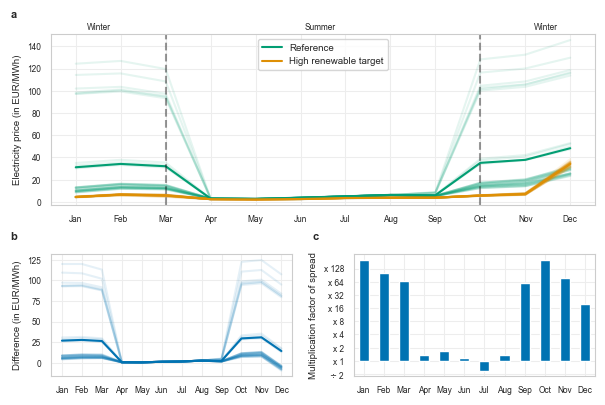

In [42]:
fig = plt.figure(figsize=(15 * cm, 10 * cm), layout="constrained")
spec = fig.add_gridspec(2, 2, height_ratios=[1.4, 1])

################################################################################################################

ax0 = fig.add_subplot(spec[0, :])
max_y = np.max([df_elec_price_monthly_ref_renewable.max(), df_elec_price_monthly_high_renewable.max()])
min_y = np.min([df_elec_price_monthly_ref_renewable.min(), df_elec_price_monthly_high_renewable.min()])

df_elec_price_monthly_ref_renewable.plot(ax=ax0, alpha=0.1, color=green, legend=False)
df_elec_price_monthly_high_renewable.plot(ax=ax0, alpha=0.1, color=orange, legend=False)

df_elec_price_monthly_ref_renewable.mean(axis=1).rename("mean_ref_renewable").plot(ax=ax0, color=green, label="Reference", legend=True)
df_elec_price_monthly_high_renewable.mean(axis=1).rename("mean_high_renewable").plot(ax=ax0, color=orange, label="High renewable target", legend=True)

ax0.axvline(2, color="black", alpha=0.4, linestyle="--")
ax0.axvline(9, color="black", alpha=0.4, linestyle="--")

ax0.text(x=0.25, y=155, s="Winter", fontsize=fontsize_ticks)
ax0.text(x=10.2, y=155, s="Winter", fontsize=fontsize_ticks)
ax0.text(x=5.1, y=155, s="Summer", fontsize=fontsize_ticks)

ax0.set_ylim([min_y - 5, max_y + 5])
ax0.set_ylabel("Electricity price (in EUR/MWh)", fontsize=fontsize_labels)

ax0.set_xticks(range(len(df_elec_price_monthly_ref_renewable)))
ax0.set_xticklabels(df_elec_price_monthly_ref_renewable.index)

ax0.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax0.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax0.set_title("a", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.075, y=1.05)

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=handles[-2:], labels=labels[-2:], loc='upper center', fontsize=fontsize_labels)

################################################################################################################

ax10 = fig.add_subplot(spec[1, 0])

(df_elec_price_monthly_ref_renewable - df_elec_price_monthly_high_renewable).plot(ax=ax10, alpha=0.1, color=blue, legend=False)

(df_elec_price_monthly_ref_renewable.mean(axis=1).rename("mean_ref_renewable") - 
    df_elec_price_monthly_high_renewable.mean(axis=1).rename("mean_high_renewable")).plot(ax=ax10, color=blue, legend=False)

ax10.set_ylabel("Difference (in EUR/MWh)", fontsize=fontsize_labels)

ax10.set_xticks(range(len(df_elec_price_monthly_ref_renewable)))
ax10.set_xticklabels(df_elec_price_monthly_ref_renewable.index)

ax10.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax10.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax10.set_title("b", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.17, y=1.05)

################################################################################################################

ax11 = fig.add_subplot(spec[1, 1])

sigma_ratios = np.log2(df_elec_price_monthly_ref_renewable.std(axis=1).rename("mean_ref_renewable") / 
                df_elec_price_monthly_high_renewable.std(axis=1).rename("mean_high_renewable"))

sigma_ratios.plot.bar(ax=ax11, color=blue, legend=False)

ax11.set_xticklabels(ax11.get_xticklabels(which="both"), rotation=0)

ax11.set_ylabel(r'Multiplication factor of spread', fontsize=fontsize_labels)
yticks = np.arange(int(sigma_ratios.min()) - 1, int(sigma_ratios.max()) + 1, 1, dtype=float)
ytick_labels = ["x " + str(int(2**n)) if n >= 0 else r"$\div$ " + str(int(2**(-n))) for n in yticks]
ax11.set_yticks(yticks, labels=ytick_labels)

ax11.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax11.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax11.set_title("c", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.17, y=1.05)

plt.savefig(path_figs / "fig_5.pdf", dpi=300, bbox_inches="tight")
plt.show()

## Fig 6 - Wind capacity + net winter imports

In [43]:
def compute_slopes(
        x_array: np.ndarray,
        y_series: pd.Series
    ) -> Dict:
    X = x_array.reshape(-1, 1)
    coef, _, _, conf_interval = NationalAnalysisHydropower.compute_trend_statsmodel(X, y_series.values)
    dict_coeffs ={
        "name": y_series.name,
        "coef": coef,
        "lower": conf_interval[1][0],
        "upper": conf_interval[1][1],
    }
    
    return dict_coeffs

def compute_error_bars(df_coeffs_scenarios: pd.DataFrame) -> List[float]:
    per_ror_gen_error = [
        [df_coeffs_scenarios["coef"].iloc[0] - df_coeffs_scenarios["lower"].iloc[0], 
         df_coeffs_scenarios["upper"].iloc[0] - df_coeffs_scenarios["coef"].iloc[0]],
        [df_coeffs_scenarios["coef"].iloc[1] - df_coeffs_scenarios["lower"].iloc[1], 
         df_coeffs_scenarios["upper"].iloc[1] - df_coeffs_scenarios["coef"].iloc[1]]
    ]

    return per_ror_gen_error

In [44]:
columns_df_gen = df_gen_ref_renewable.loc[:, (1991, slice(None))].columns.get_level_values(1).to_list()
columns_df_gen.remove("RoR")
df_slopes_gen = []
for column in columns_df_gen:
    df_slopes_gen.append(
        pd.concat([pd.DataFrame([
            compute_slopes(df_annual_ror_gen_ref_renewable_twh, 
                           (df_gen_ref_renewable.loc[:, (slice(None), column)].sum().droplevel(1) * 1e-6).rename("Reference")
                          ),
            compute_slopes(df_annual_ror_gen_high_renewable_twh, 
                           (df_gen_high_renewable.loc[:, (slice(None), column)].sum().droplevel(1) * 1e-6).rename("High renewable target")
                          )
        ]), pd.Series([column]*2, name="type")], axis=1)
    )
df_slopes_gen = pd.concat(df_slopes_gen).set_index(["type", "name"])
df_slopes_gen.head()

coef     lower     upper
type             name                                            
Dam              Reference             -0.275 -0.355122 -0.194076
                 High renewable target -0.078 -0.111943 -0.043243
Nuclear          Reference              0.000  0.000000  0.000000
                 High renewable target  0.000  0.000000  0.000000
Nuclear-FastRamp Reference              0.000  0.000000  0.000000

In [45]:
df_slopes_gen_ref_renewable = df_slopes_gen.loc[(slice(None), "Reference"), :]
df_slopes_gen_ref_renewable.sort_values("coef").head(5)

,,coef,lower,upper
type,name,,,
Dam,Reference,-0.275,-0.355122,-0.194076
Exports,Reference,-0.243,-0.285554,-0.200679
PV-Total,Reference,-0.181,-0.307169,-0.055731
PV-alpine,Reference,-0.181,-0.307169,-0.055731
Imports,Reference,-0.178,-0.342374,-0.014168


In [46]:
df_slopes_gen_high_renewable = df_slopes_gen.loc[(slice(None), "High renewable target"), :]
df_slopes_gen_high_renewable.sort_values("coef").head(5)

,,coef,lower,upper
type,name,,,
Imports,High renewable target,-0.487,-0.524125,-0.449789
Exports,High renewable target,-0.416,-0.463306,-0.369668
Dam,High renewable target,-0.078,-0.111943,-0.043243
Pump-Open,High renewable target,-0.075,-0.090111,-0.058938
Waste,High renewable target,-0.002,-0.002749,-0.000937


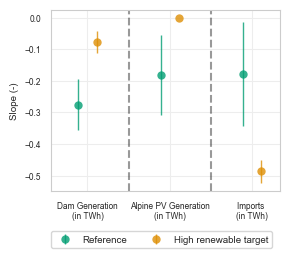

In [47]:
fig, ax = plt.subplots(figsize=(7.5 * cm, 6 * cm))

colors = [green, orange]
alphas = [(0.8,), (0.8,)]
colors_with_alpha = [c + a for c, a in zip(colors, alphas)]

compensation_tech = ["Dam", "PV-alpine", "Imports"]

errors = {tech: compute_error_bars(df_slopes_gen.loc[(tech, slice(None)), :]) for tech in compensation_tech}

x_positions = np.array([0.8, 2.6, 4.4])  # Positions for the two variables
width = 0.4  # Separation for scenarios

# Plot for Scenario 1
ax.errorbar(x_positions - width/2, 
               [df_slopes_gen.loc[(tech, slice(None)), "coef"].iloc[0] for tech in compensation_tech], 
               yerr=np.transpose([errors[tech][0] for tech in compensation_tech]), fmt='o', 
               label='Reference', color=colors_with_alpha[0], ecolor=colors_with_alpha[0], elinewidth=1, linewidth=0, markeredgewidth=0)

# Plot for Scenario 2
ax.errorbar(x_positions + width/2, 
               [df_slopes_gen.loc[(tech, slice(None)), "coef"].iloc[1] for tech in compensation_tech], 
               yerr=np.transpose([errors[tech][1] for tech in compensation_tech]), fmt='o', 
               label='High renewable target', color=colors_with_alpha[1], ecolor=colors_with_alpha[1], elinewidth=1, markeredgewidth=0)

ax.axvline(1.7, color="black", alpha=0.4, linestyle="--")
ax.axvline(3.5, color="black", alpha=0.4, linestyle="--")


ax.set_xticks(x_positions)
ax.set_xticklabels(['Dam Generation\n(in TWh)', 'Alpine PV Generation\n(in TWh)', 'Imports \n(in TWh)'])
ax.set_ylabel('Slope (-)', fontsize=fontsize_labels)
ax.set_xlim(0, 5)

ax.tick_params(axis="both", which="major", labelsize=fontsize_ticks)
ax.tick_params(axis="both", which="minor", labelsize=fontsize_ticks)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.15), fontsize=fontsize_labels)

plt.savefig(path_figs / "fig_6.pdf", dpi=300, bbox_inches="tight")
plt.show()

## Understanding the effect of weather types on electricity prices

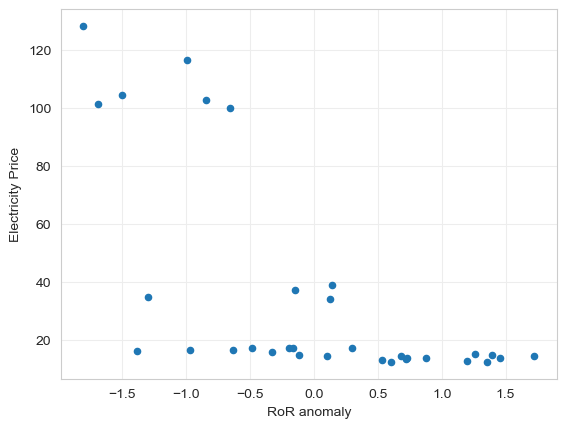

In [48]:
df_compare_nov_elec_price_ror_anomaly_ref_renewable = pd.concat([
    df_elec_price_monthly_ref_renewable.loc["Oct"].rename("Electricity Price"),
    pd.Series(df_annual_ror_gen_ref_renewable_anomaly, index=df_elec_price_monthly_ref_renewable.columns).rename("RoR anomaly")
], axis=1)

df_compare_nov_elec_price_ror_anomaly_ref_renewable.sort_values(by="Electricity Price").plot.scatter(x="RoR anomaly", y="Electricity Price")
plt.show()

In [49]:
df_slopes_elec_price_ror_anomaly = []
for month in ["Jan", "Feb", "Mar", "Oct", "Nov", "Dec"]: 
    df_compare_nov_elec_price_ror_anomaly_ref_renewable = pd.concat([
        df_elec_price_monthly_ref_renewable.loc[month].rename("Electricity Price"),
        pd.Series(df_annual_ror_gen_ref_renewable_anomaly, index=df_elec_price_monthly_ref_renewable.columns).rename("RoR anomaly")
    ], axis=1).sort_values(by="Electricity Price")
    
    df_slopes_elec_price_ror_anomaly.append(compute_slopes(df_compare_nov_elec_price_ror_anomaly_ref_renewable["RoR anomaly"].values,
                                                           df_compare_nov_elec_price_ror_anomaly_ref_renewable["Electricity Price"].rename(month)))

pd.DataFrame(df_slopes_elec_price_ror_anomaly)

,name,coef,lower,upper
0,Jan,-24.848,-35.285425,-14.410027
1,Feb,-24.608,-34.925643,-14.291147
2,Mar,-23.113,-32.837371,-13.389468
3,Oct,-24.622,-34.971474,-14.271647
4,Nov,-25.188,-35.644177,-14.731299
5,Dec,-25.539,-36.002754,-15.075888
